In [1]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in ./.local/lib/python3.8/site-packages (0.24.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U matplotlib

Requirement already up-to-date: matplotlib in ./.local/lib/python3.8/site-packages (3.4.3)
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas
global_data = pandas.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv", usecols = ['Global_Sales'])
global_data = global_data.values.tolist()
for i in range(0, len(global_data)):
    global_data[i][0] = int(global_data[i][0]*100)

na_data = pandas.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv", usecols = ['NA_Sales'])
na_data = na_data.values.tolist()
for i in range(0, len(na_data)):
    na_data[i][0] = int(na_data[i][0]*100)

Task 1:

0.2710326953748006


/home/bouchc2/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.27093301435406697


[Text(146.47500000000002, 195.696, 'X[0] <= 6.5\ngini = 0.915\nsamples = 6687\nvalue = [1792, 239, 221, 239, 228, 219, 207, 183, 176, 173\n165, 144, 114, 118, 101, 89, 84, 85, 81, 74, 76\n58, 51, 62, 58, 65, 48, 36, 89, 53, 29, 36, 35\n30, 31, 38, 27, 32, 28, 26, 26, 30, 20, 24, 18\n28, 20, 16, 22, 20, 17, 16, 23, 11, 12, 23, 16\n14, 10, 11, 7, 18, 12, 10, 8, 8, 11, 7, 8, 10\n13, 10, 5, 12, 11, 11, 8, 7, 8, 7, 4, 6, 4\n8, 10, 5, 6, 7, 7, 5, 7, 12, 5, 5, 4, 8, 2\n7, 6, 7, 6, 7, 2, 7, 3, 8, 2, 6, 1, 2, 9\n5, 2, 3, 1, 4, 3, 2, 4, 4, 6, 4, 3, 4, 1\n2, 3, 4, 4, 1, 2, 2, 6, 2, 1, 3, 5, 1, 6\n5, 1, 1, 3, 2, 2, 1, 4, 2, 3, 1, 1, 3, 1\n4, 3, 1, 3, 2, 3, 2, 2, 1, 4, 1, 1, 2, 3\n1, 1, 1, 1, 2, 4, 2, 2, 3, 4, 1, 4, 2, 3\n2, 4, 1, 3, 2, 1, 3, 1, 1, 3, 1, 1, 2, 3\n2, 1, 1, 1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1\n2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

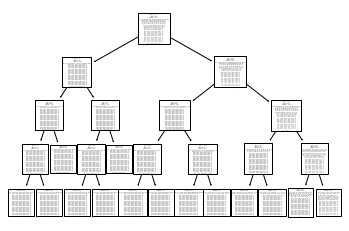

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(global_data, na_data, test_size=0.6, random_state=101)
c_tree = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=2, random_state=101)
c_tree.fit(x_train, y_train)

prediction = c_tree.predict(x_test)
accuracy = metrics.accuracy_score(y_test, prediction)
print(accuracy)

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1).fit(x_train, y_train)
print(clf.score(x_test, y_test))

tree.plot_tree(c_tree)

Task 1 Response:
The accuracy of the Decision Tree Classifier floated around 0.26 but fluctuated based on the parameters I used.  For example, using the random state 101 to seed my results for the sake of replicatability, I got an accuracy of 0.2687799043062201 when using max_depth=7, min_samples_split=4, and a test_size of 0.5.  Changing min_samples_split seemed to have no affect on accuracy regardless of the other parameters I used.  Changing test_size fluctuated results between 0.258 and 0.263 with the highest values accuracies occuring most often around test size 0.6.  The parameter that had the largest effect though was from changing max_depth, which caused the accuracy to rise up as depth was set lower util it peaked at 0.2710326953748006 when using max_depth=2 and min_samples_split=2 with a test size of 0.6.

Task 2 Bagging:

In [27]:
import numpy
arr = []
for i in y_train:
    arr.append(i[0])
y_train = numpy.asarray(arr)

Accuracy: 0.264 (0.008)
Predicted Class: 4136
0.26016746411483255


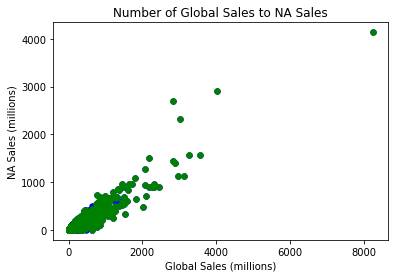

In [28]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier

global_data = numpy.asarray(global_data)
na_data = numpy.asarray(na_data)

model = BaggingClassifier(n_estimators=50)
cv = KFold()
n_scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
model.fit(x_train, y_train)
yhat = model.predict(global_data)
print('Predicted Class: %d' % yhat[0])

clf = SVC(kernel='linear', C=1).fit(x_train, y_train)
print(clf.score(x_test, y_test))

plt.scatter(global_data, na_data, label= "data", color= "blue", s=30)
plt.scatter(global_data, yhat, label= "prediction", color= "green", s=30)
plt.xlabel('Global Sales (ten thousands)')
plt.ylabel('NA Sales (ten thousands)')
plt.title('Number of Global Sales to NA Sales')
plt.show()

Task 2 Boosting:

Accuracy: 0.271 (0.007)
Predicted Class: 434
0.26016746411483255


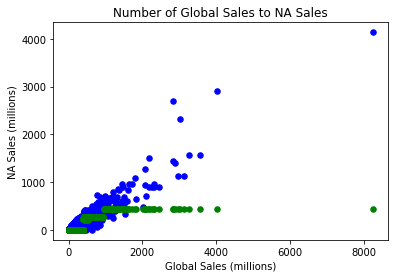

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(c_tree, x_train, y_train, cv=cv)

cv = KFold()
n_scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
model.fit(x_train, y_train)
yhat = model.predict(global_data)
print('Predicted Class: %d' % yhat[0])

clf = SVC(kernel='linear', C=1).fit(x_train, y_train)
print(clf.score(x_test, y_test))

plt.scatter(global_data, na_data, label= "data", color= "blue", s=30)
plt.scatter(global_data, yhat, label= "prediction", color= "green", s=30)
plt.xlabel('Global Sales (ten thousands)')
plt.ylabel('NA Sales (ten thousands)')
plt.title('Number of Global Sales to NA Sales')
plt.show()

Task 2 Response:
The accuracies of both the Bagging Classifier and Ada Boost Classifier were very similar.  The Bagging Classifier resulted in an accuracy of 0.264 with a standard deviation of 0.008 while the Ada Boost Classifier was slightly more accurate with an accuracy of 0.271 and a slightly smaller standard deviation of 0.007.  Bagging predicted 4136 and the graph plot showed green prediction points roughly over the entire original blue global data points, while Ada Boost predicted 434 with the green prediction points appearing in more of a staircase pattern the slowly rose.

Task 3 Response:
All three of the above models had relatively similar accuracies around the 0.25-0.27 range.  I think the KFold model is not particularly well suited for the data I am using as the data itself does not follow a very tight line, causing lower accuracies when estimating based off of other data points. I believe switching my data to being ran through any classifier that uses accuracy as its metric is not the best due to this reason.  For example, I used the score function in sklearn alongside each of the three models to see the percentage of predictions made that were exactly correct.  My results from these three runs were 0.27093301435406697, 0.26016746411483255, and 0.26016746411483255, which were all inaccurate.  I believe this is a fault of my data rather than the classifiers because although it may look like the data has a correlation on the graph, because of a few outliers with very high numbers, the graph is very zoomed out.  If the graph were brought closer to where many of the data points between 2000 Global Sales (ten thousands) and 1000 NA Sales (ten thousands), the data points would appear much more spread out and show why these classifiers are not showing high accuracies.